# Saarthak Marathe | ME17B162

## Week 6: Dimensionality Reduction (PCA) and Model Validation

**(1a) Load the data file 'data1.csv' and visualize the data using a scatter plot.**

In [1]:
# Write Code here
import pandas as pd
df = pd.read_csv('data1.csv',header=None)
df

,0,1
0,-3.086760,0.012814
1,2.368870,-0.056970
2,-0.741769,0.089533
3,-1.221298,0.145294
4,-2.080397,0.118519
5,-4.326320,-0.143142
6,4.123034,-0.194022
7,-2.652204,0.077234
8,0.499932,-0.079527
9,-0.838980,0.092056


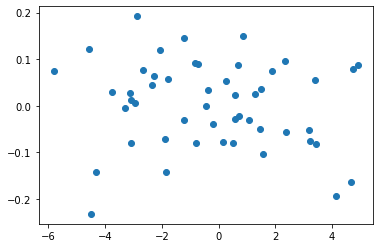

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df[0],df[1])

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [3]:
# Write Code here
loss_x1 = df[0].apply(lambda x:x**2).sum()
loss_x2 = df[1].apply(lambda x:x**2).sum()
print('Loss when y=x1:',loss_x1)
print('Loss when y=x2:',loss_x2)

Loss when y=x1: 358.1035064241587
Loss when y=x2: 0.4191265524458239


We can see that choosing the first feature for representation has the higher loss 

**(1c) Visualize the approximated data and compare it with the original data using scatter plot**

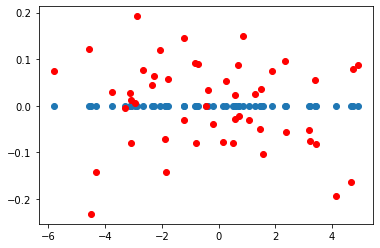

In [4]:
# Write Code here
import numpy as np
plt.scatter(df[0], np.zeros(len(df)))
plt.scatter(df[0], df[1], color='red')

**(2a) Load the data file 'data2.csv'.**

In [5]:
# Write Code here
import pandas as pd
df2 = pd.read_csv('data2.csv',header=None)
df2

,0,1,2,3
0,0.007589,-8.886696,-12.316361,-0.036092
1,-1.461927,3.977425,-17.784232,0.075197
2,-0.891625,-7.426320,25.122113,-0.150440
3,1.057471,4.184783,39.927021,0.068328
4,0.147645,-0.309380,33.502600,-0.125913
...,...,...,...,...
995,-1.881842,3.712485,11.849708,-0.066713
996,0.914472,5.272099,-21.545739,0.042019
997,-0.077867,2.899303,-12.374721,0.044212
998,-0.280726,-11.504575,-17.164410,0.079759


**(2c) Plot the minimum representation loss as a function of the number of features used for representation. Vary the number of features from 0 to 3**

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**


Loss for  4  feature(s) together: 1053532.706603053

Loss for  3  feature(s) together: 40144.08351639332

Loss for  2  feature(s) together: 995.8187414901331

Loss for  1  feature(s) together: 5.10568517097272


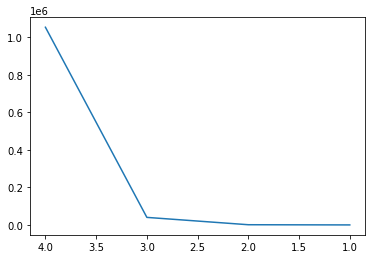

In [6]:
# Write Code here
n = [0,1,2,3]
n_loss = []
ind_loss = df2.apply(lambda x:x**2).sum()
ind_loss = ind_loss.sort_values(ascending = False)#descending order for each feature
total_loss = sum(ind_loss)
for i in range(len(n)):
    loss = 0
    loss = total_loss - sum(ind_loss[:i])
    n_loss.append(loss)
    print('\nLoss for ',4-i,' feature(s) together:',n_loss[i])
plt.plot([4,3,2,1],n_loss)
plt.gca().invert_xaxis()
plt.show()

In [7]:
print('decreasing order of significance of features: ',ind_loss.index)

decreasing order of significance of features:  Int64Index([2, 1, 0, 3], dtype='int64')


**(2d) Compute the covariance matrix of the data. Give your observations between the values in covariance matrix and feature importance obtained in (2c).**

In [8]:
# Write code here
mean = [0]*4
df2 = df2 - df2.mean()
cov2 = np.dot(np.transpose(np.array(df2)),np.array(df2))/4
print('Covariance matrix is:\n',cov2)
print('\nDiagonal of the cov matrix:', np.diag(cov2))

Covariance matrix is:
 [[ 2.46552275e+02 -1.42804160e+01 -3.52124701e+01  7.63378509e-01]
 [-1.42804160e+01  9.78575204e+03  2.91398457e+01 -1.94062582e+00]
 [-3.52124701e+01  2.91398457e+01  2.51995201e+05  1.39447767e+01]
 [ 7.63378509e-01 -1.94062582e+00  1.39447767e+01  1.27197487e+00]]

Diagonal of the cov matrix: [2.46552275e+02 9.78575204e+03 2.51995201e+05 1.27197487e+00]


From the diagonal elements we can see that the decreasing order of significance is: [2 1 0 3]

**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of data**

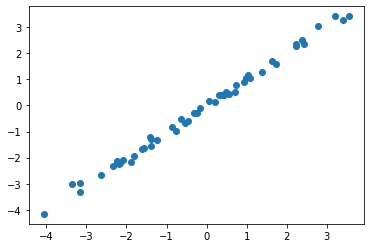

In [9]:
# Write code here
df3 = pd.read_csv('data3.csv',header=None)
plt.scatter(df3[0],df3[1])

In [10]:
df3 = df3 - df3.mean()
cov3 = np.dot(np.transpose(np.array(df3)),np.array(df3))/2
print('Covariance matrix is:\n',cov3)

Covariance matrix is:
 [[88.05705953 88.63031282]
 [88.63031282 89.62243692]]


**(3c) Apply PCA to transform data by retaining only 1 PC. Now, visualize the data points in transformed 1-dimensional space**

In [11]:
# Write code here
l,v = np.linalg.eig(cov3)
l,v

(array([  0.20597953, 177.47351692]),
 array([[-0.710222  , -0.70397777],
        [ 0.70397777, -0.710222  ]]))

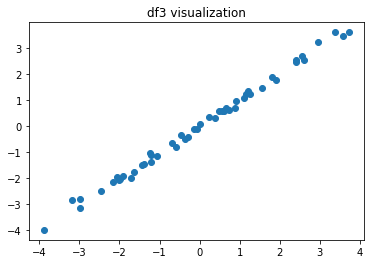

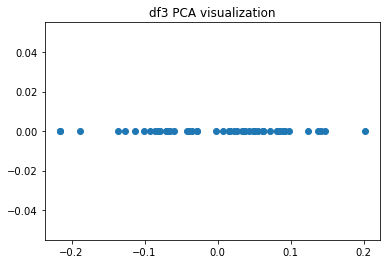

In [12]:
l_ranks = np.argsort(-l)
l = l[l_ranks]
v = np.transpose(v[l_ranks])
top_v = v[:1, :]
df3_pca =  np.dot(df3, np.transpose(top_v))
plt.scatter(df3[0], df3[1])
plt.title('df3 visualization')
plt.show()

plt.scatter(df3_pca, df3[1]*0)
plt.title('df3 PCA visualization')
plt.show()

**(3d) Compute the representational loss (with respect to the original data).**

**(3e) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [16]:
#Write code here
pca_data = np.hstack((df3_pca, np.zeros((df3_pca.shape[0],1))))
pca_loss = np.sum(np.square(df3_pca-pca_data))
print("Representational loss with PCA:", pca_loss)

print("\nLoss without transformation")
print("Representational loss if x0 is selected:", df3[0].apply(lambda x: x**2).sum())
print("Representational loss if x1 is selected:", df3[1].apply(lambda x: x**2).sum())

Representational loss with PCA: 0.43960548356202583

Loss without transformation
Representational loss if x0 is selected: 176.11411905436032
Representational loss if x1 is selected: 179.24487384295819


As we can see, the PCA representation has much lower losses than the ones used without transformation. Thus PCA is the preferred method

### Application of PCA on real dataset

**(4a) Load the human face data set from sklearn (fetch_lfw_people).**

In [101]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

**(4b) Apply PCA on the faces data (sklearn can be used). Take the top 150 features from PCA. Reconstruct the images with the these 150 features and visualise them. Give your observations.**


Original images


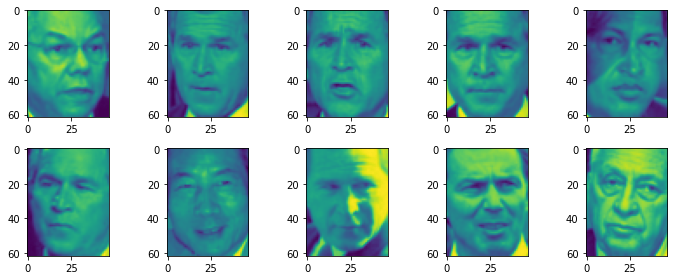


Recon images


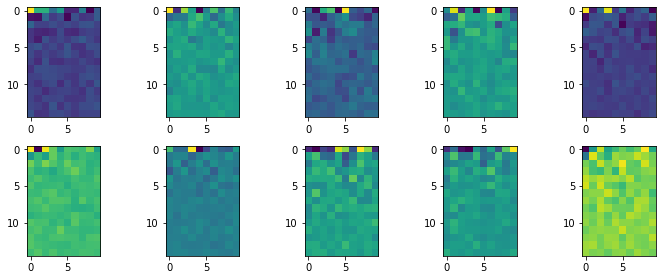

In [115]:
# Write your code here
from sklearn.decomposition import PCA
pca = PCA(n_components=150)

faces_data = faces['data']
faces_images = faces['images']
faces_data_pca = pca.fit_transform(faces_data)
faces_pca_images = faces_data_pca.reshape(-1,15,10) #150=10*15
print("\nOriginal images")
orig_faces = faces_images[:10]
fig = plt.figure(figsize=(10, 4))
for i in range(10):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(orig_faces[i])
plt.tight_layout()
plt.show()

print("\nRecon images")
recon_faces = faces_pca_images[:10]
fig = plt.figure(figsize=(10, 4))
for i in range(10):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(recon_faces[i])
plt.tight_layout()
plt.show()

2000+ features were reduced to 150 which leads to reduction and loss of information. So that is why the reconstructed images are pixelated

### 5) Cross validation to select parameters for Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$


Perform ridge rigression using gradient descent on the data 4 provided. (You can use sklearn)

Try to fit the data with polynomial of degree 3 and 

- For $\lambda$ choose from = [10,100,1000]
- choose learning rate (here it is $\alpha$)= [ 0.01,0.001,0.0001]
- max_iters = 1000

Choose the best combination of $\lambda$ and $\alpha$ using 5-fold cross validation on the dataset provided and report the same.


In [131]:
# Write your code here
from sklearn.linear_model import SGDRegressor
from collections import defaultdict
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X = pd.read_csv(r"data_X.txt",header=None, delim_whitespace=True)
y = pd.read_csv(r"data_y.txt", header= None)

del X[13]
y = y.drop([506])

In [135]:
import warnings
warnings.filterwarnings('ignore')
X = pd.DataFrame(StandardScaler().fit_transform(X))
X_poly = PolynomialFeatures(degree=3).fit_transform(X)

lambdas = [10,100,1000]
alphas = [0.01, 0.001, 0.0001]
max_iters = 1000
scores = 0
for lamda in lambdas:
    for alpha in alphas:
        reg = SGDRegressor(alpha=lamda, max_iter =max_iters, learning_rate='constant', eta0=alpha)
        scores = cross_val_score(reg,X_poly, y, scoring='neg_mean_squared_error', cv=5)
        print("lambda =", lamda,", alpha =", alpha,", MSE =", -sum(scores)/5,"\n")

lambda = 10 , alpha = 0.01 , MSE = 4.906169333915207e+25 

lambda = 10 , alpha = 0.001 , MSE = 6.470888611062882e+26 

lambda = 10 , alpha = 0.0001 , MSE = 2.7209705576638636e+22 

lambda = 100 , alpha = 0.01 , MSE = 8.717498434287259e+20 

lambda = 100 , alpha = 0.001 , MSE = 6.248980966015765e+20 

lambda = 100 , alpha = 0.0001 , MSE = 5.878485677351587e+19 

lambda = 1000 , alpha = 0.01 , MSE = 1.5624374001053702e+22 

lambda = 1000 , alpha = 0.001 , MSE = 109.37198666283034 

lambda = 1000 , alpha = 0.0001 , MSE = 82.52051292296645 



We can see of all the outputs, lambda = 1000 and alpha = 0.0001 gives the lowest MSE